In [11]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/home/borislav/Загрузки/conversion.csv')

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [3]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [4]:
df.isna().mean()

ad_id                  0.0
xyz_campaign_id        0.0
fb_campaign_id         0.0
age                    0.0
gender                 0.0
interest               0.0
Impressions            0.0
Clicks                 0.0
Spent                  0.0
Total_Conversion       0.0
Approved_Conversion    0.0
dtype: float64

In [6]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [9]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

Всего было проведено 3 рекламных кампании

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. 

In [24]:
z = np.log(df.groupby('fb_campaign_id').agg({'Impressions':'sum'}))

/home/borislav/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

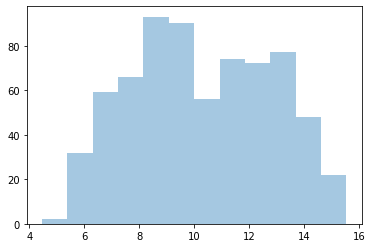

In [25]:
sns.distplot(z, kde= False)

Получено бимодальное распределние

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR= 
impressions
clicks
​
 

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [26]:
df['ctr'] = df.Impressions / df.Clicks

In [30]:
df.drop(columns='ctr')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [31]:
df['ctr'] = df['Clicks'] / df['Impressions']

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id)

In [36]:
df.groupby('ad_id')['ctr'].sum().reset_index().sort_values('ctr', ascending = False)

,ad_id,ctr
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
270,777166,0.000000
269,777131,0.000000
268,777130,0.000000
266,776935,0.000000


<AxesSubplot:>

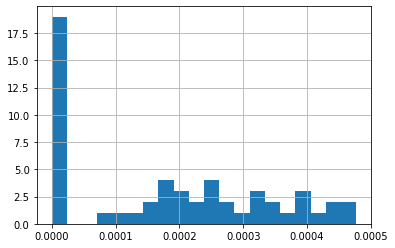

In [55]:
df[df['xyz_campaign_id'] == 916].ctr.hist(bins = 20)

In [56]:
df['cpc'] = df.Spent / df.Clicks

Для CPC
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

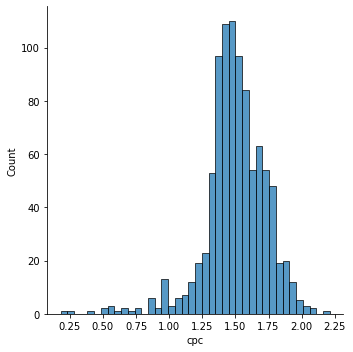

In [65]:
sns.displot(x = df['cpc'].dropna())

In [66]:
stats.iqr(df['cpc'], nan_policy= 'omit')

0.2543636990499998

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления

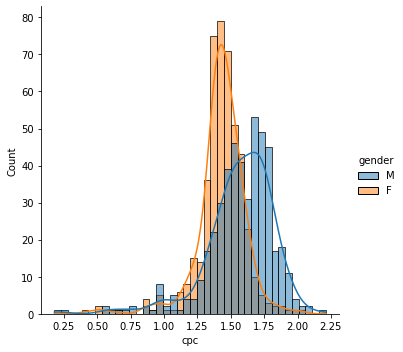

In [79]:
sns.displot(x = df.cpc, hue = df.gender, kde = True)

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [80]:
df['conversion'] = df['Approved_Conversion'] / df['Clicks']

In [83]:
round(df[df['ad_id'] == 1121814].conversion * 100,2)


860    3.09
Name: conversion, dtype: float64